In [1]:
!pip install seaborn==0.11.0
#need not do this locally if you have this version installed
#add a header text file saying ds203 project pha thing eda part

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("final.csv")
display(df)

,Unnamed: 0,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,H_sigma,diameter_sigma,ma,sigma_om,class,data_arc,condition_code,rms
0,0,2000433,11.160,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.270,NaN,0.060,271.071733,0.000004,AMO,46330.0,0.0,0.28397
1,1,2000719,15.500,NaN,NaN,214,NaN,0.203482,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955,0.0,NaN,NaN,5.801,NaN,NaN,140.273422,0.000017,AMO,39593.0,0.0,0.39148
2,2,2000887,13.800,NaN,NaN,311,NaN,0.082217,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323,0.0,4.200000,0.310,73.970,NaN,NaN,294.579167,0.000026,AMO,37558.0,0.0,0.44039
3,3,2001036,9.400,NaN,NaN,823,NaN,0.344956,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582,0.0,37.675000,0.238,10.297,NaN,0.399,4.817744,0.000007,AMO,35105.0,0.0,0.38018
4,4,2001221,17.700,NaN,NaN,104,NaN,0.107450,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615,0.0,1.000000,NaN,NaN,NaN,NaN,38.522411,0.000023,AMO,32328.0,0.0,0.45839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,24631,54097467,21.000,NaN,NaN,2,NaN,0.192704,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741,0.0,NaN,NaN,NaN,0.37891,NaN,351.405894,0.016072,AMO,7.0,9.0,0.23911
24632,24632,54097667,23.463,NaN,NaN,1,NaN,0.045436,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568,0.0,NaN,NaN,NaN,0.51707,NaN,356.724840,0.006034,AMO,10.0,8.0,0.45779
24633,24633,54097668,25.282,NaN,NaN,1,NaN,0.005352,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466,0.0,NaN,NaN,NaN,0.24557,NaN,5.162592,0.000737,APO,1.0,8.0,0.43094
24634,24634,54097669,21.967,NaN,NaN,1,NaN,0.018582,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470,1.0,NaN,NaN,NaN,0.85458,NaN,344.370686,0.760730,APO,3.0,9.0,0.26581


In [4]:
print('df number of records = '+str(df.shape[0]))
print('df number of variables = '+str(df.shape[1]))
df_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df.columns.values:
    list_vals = pd.unique(df[col])
    df_stats = df_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)  

df number of records = 24636
df number of variables = 29
The only enteries in the field pha are:0.0, 1.0, nan
The only enteries in the field class are:AMO, APO, ATE, IEO, nan


,Field_name,Type,No_unique_vals,No_null_enteries
0,Unnamed: 0,int64,24636,0
1,Neo Reference ID,int64,24636,0
2,Absolute Magnitude,float64,2717,10
3,Relative Velocity km per sec,float64,3693,20944
4,Miss Dist.(kilometers),float64,3676,20944
5,orbit_id,int64,330,0
6,Orbit Uncertainity,float64,11,20944
7,Minimum Orbit Intersection,float64,24381,1
8,Jupiter Tisserand Invariant,float64,4532,0
9,Eccentricity,float64,24629,0


 
The number of columns with no missing entries are 12


In [6]:
df = df.drop("Unnamed: 0",axis = 1)  
dfk = df.fillna(-1)

In [7]:
dfk

,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,H_sigma,diameter_sigma,ma,sigma_om,class,data_arc,condition_code,rms
0,2000433,11.160,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.270,-1.00000,0.060,271.071733,0.000004,AMO,46330.0,0.0,0.28397
1,2000719,15.500,-1.000000,-1.0,214,-1.0,0.203482,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955,0.0,-1.000000,-1.000,5.801,-1.00000,-1.000,140.273422,0.000017,AMO,39593.0,0.0,0.39148
2,2000887,13.800,-1.000000,-1.0,311,-1.0,0.082217,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323,0.0,4.200000,0.310,73.970,-1.00000,-1.000,294.579167,0.000026,AMO,37558.0,0.0,0.44039
3,2001036,9.400,-1.000000,-1.0,823,-1.0,0.344956,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582,0.0,37.675000,0.238,10.297,-1.00000,0.399,4.817744,0.000007,AMO,35105.0,0.0,0.38018
4,2001221,17.700,-1.000000,-1.0,104,-1.0,0.107450,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615,0.0,1.000000,-1.000,-1.000,-1.00000,-1.000,38.522411,0.000023,AMO,32328.0,0.0,0.45839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,54097467,21.000,-1.000000,-1.0,2,-1.0,0.192704,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741,0.0,-1.000000,-1.000,-1.000,0.37891,-1.000,351.405894,0.016072,AMO,7.0,9.0,0.23911
24632,54097667,23.463,-1.000000,-1.0,1,-1.0,0.045436,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568,0.0,-1.000000,-1.000,-1.000,0.51707,-1.000,356.724840,0.006034,AMO,10.0,8.0,0.45779
24633,54097668,25.282,-1.000000,-1.0,1,-1.0,0.005352,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466,0.0,-1.000000,-1.000,-1.000,0.24557,-1.000,5.162592,0.000737,APO,1.0,8.0,0.43094
24634,54097669,21.967,-1.000000,-1.0,1,-1.0,0.018582,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470,1.0,-1.000000,-1.000,-1.000,0.85458,-1.000,344.370686,0.760730,APO,3.0,9.0,0.26581


In [42]:
categorical_cols = ["orbit_id","class"]
df_categorical_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries','mode'])
for col in categorical_cols:
    list_vals = pd.unique(df[col].dropna())   
    df_categorical_stats = df_categorical_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))),"mode":df[col].mode()[0] }, ignore_index=True)
display(df_categorical_stats)



,Field_name,Type,No_unique_vals,No_null_enteries,mode
0,orbit_id,int64,330,0,4
1,class,object,4,220,APO


In [62]:
float_cols = []
for col in df.columns.values:   
    if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
      float_cols.append(col)
float_cols.remove("Neo Reference ID")
df_continuous_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries',
                                              'mean',"median","skew","min","max","25th-percentile",
                                               "75th-percentile","inter quartile range"])
def skew(col):
  if np.mean(df[col].dropna())<np.median(df[col].dropna()):
    return "Left"
  elif np.mean(df[col].dropna())>np.median(df[col].dropna()):
    return "Right"
  else :
    return "No skew"  
for col in float_cols:
   list_vals = pd.unique(df[col].dropna()) 
   df_continuous_stats = df_continuous_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))),"mean":np.mean(df[col].dropna()),
                                "median":np.median(df[col].dropna()),"skew":skew(col),
                                "min":np.min(df[col].dropna()),"max":np.max(df[col].dropna()),
                                "25th-percentile":np.quantile(df[col].dropna(),0.25),
                                "75th-percentile":np.quantile(df[col].dropna(),0.75),
                                "inter quartile range":np.quantile(df[col].dropna(),0.75)-np.quantile(df[col].dropna(),0.25)},
                                 ignore_index=True)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
display(df_continuous_stats)



,Field_name,Type,No_unique_vals,No_null_enteries,mean,median,skew,min,max,25th-percentile,75th-percentile,inter quartile range
0,Absolute Magnitude,float64,2716,10,22.93123,23.16950,Left,9.40000,33.20000,20.60000,25.20000,4.60000
1,Relative Velocity km per sec,float64,3692,20944,13.94835,12.81399,Right,0.33550,44.24469,8.31080,18.04763,9.73684
2,Miss Dist.(kilometers),float64,3675,20944,37784317.98626,38651850.00000,Left,26609.88672,74781600.00000,18385234.50000,57389857.00000,39004622.50000
3,orbit_id,int64,330,0,20.25154,9.00000,Right,1.00000,8629.00000,5.00000,20.00000,15.00000
4,Orbit Uncertainity,float64,10,20944,3.69691,4.00000,Left,0.00000,9.00000,0.00000,7.00000,7.00000
5,Minimum Orbit Intersection,float64,24380,1,0.09300,0.05257,Right,0.00000,0.70772,0.01551,0.14218,0.12667
6,Jupiter Tisserand Invariant,float64,4532,0,4.25322,4.01200,Right,-1.20500,9.98700,3.42400,4.87925,1.45525
7,Eccentricity,float64,24629,0,0.44254,0.45612,Left,0.00285,0.99648,0.31189,0.56838,0.25649
8,Inclination,float64,24629,0,12.50624,8.82124,Right,0.01451,165.54089,4.57860,17.72210,13.14350
9,Asc Node Longitude,float64,24630,0,172.89218,173.09038,Left,0.00194,359.97659,82.19231,254.05792,171.86561


### Classification of columns:-
1. **Discrete:**
    * **Categorical:** Neo Reference ID, orbit_id, pha, class.
    * **Ordinal:** Orbit Uncertainity, condition_code. 
    * **Quantised Numerical:** data_arc.
2. **Continous:**
    * **Numerical:** Absolute Magnitude, **--Avg diameter--**, Relative Velocity km per sec, Miss Dist.(kilometers), Minimum Orbit Intersection, Jupiter Tisserand Invariant, Eccentricity, Semi Major Axis, Inclination, Asc Node Longitude, Orbital Period, Perihelion Distance, Perihelion Arg, Aphelion Dist, Mean Motion, albedo, rot_per, ma, rms.

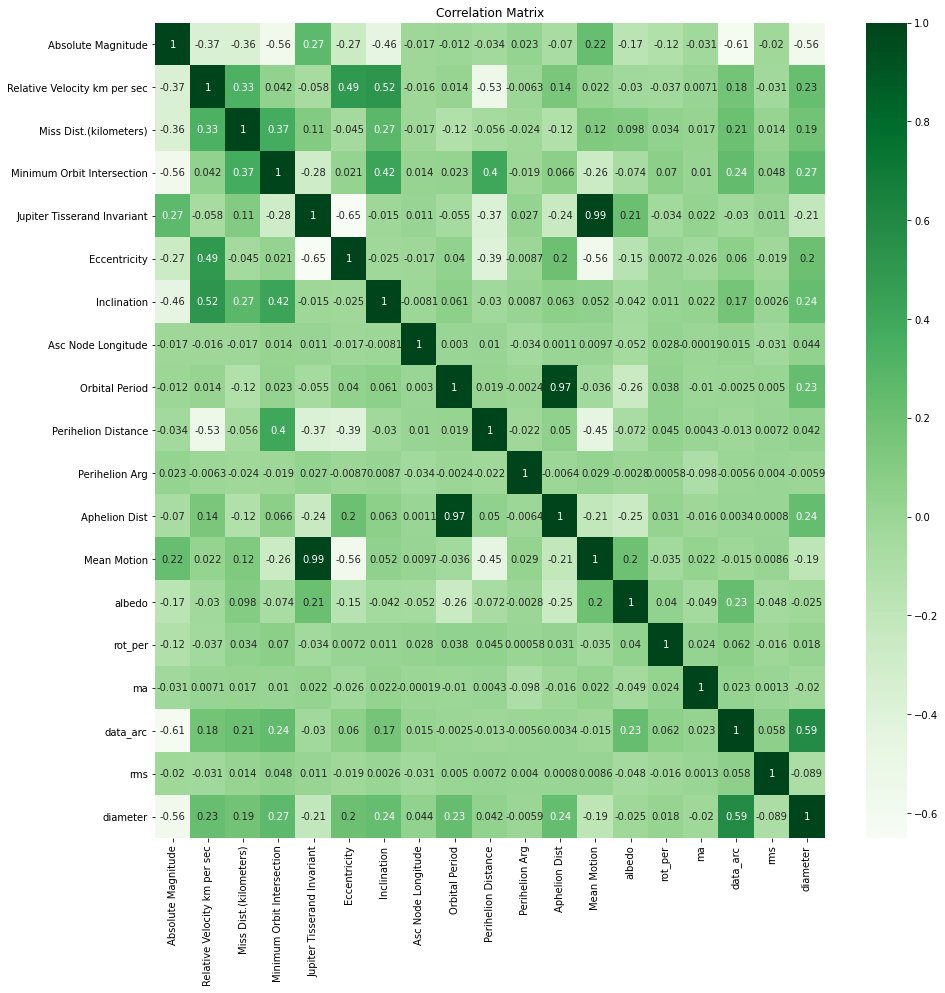

In [8]:
cont_cols = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Minimum Orbit Intersection',
             'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination', 'Asc Node Longitude',
             'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Mean Motion', 'albedo',
             'rot_per', 'ma', 'data_arc', 'rms',"diameter"]

# TODO: add avg. Diameter to this list -------done but used the name diameter
# TODO: 'Semi Major Axis' and 'Perihelion Distance' have correlation 1 

plt.figure(figsize=(15,15))

sns.heatmap(df[cont_cols].corr(), annot=True , cmap= 'Greens')   #setting up the heat map
plt.title('Correlation Matrix')
plt.show()

In [61]:
#df = df.drop("Jupiter Tisserand Invariant",axis = 1)  #highly correlated(>0.95) with another field
#df = df.drop("Orbital Period",axis = 1)  #highly correlated(>0.95) with another field  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


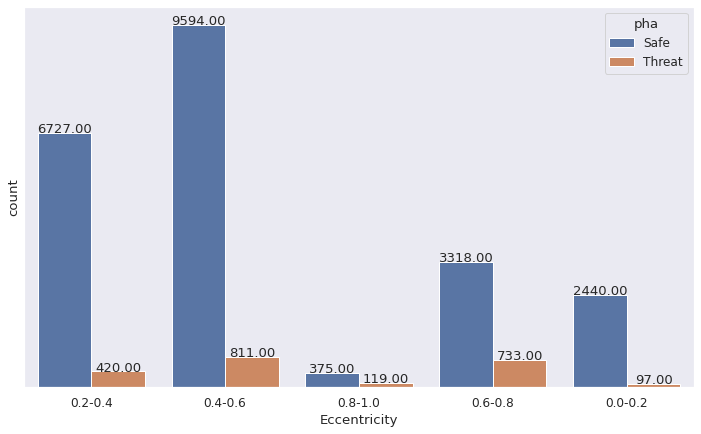

In [9]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.1)
ecc_groups = df['Eccentricity']*5//1
ecc_groups = ecc_groups.replace({0:'0.0-0.2', 1:'0.2-0.4', 2:'0.4-0.6', 3:'0.6-0.8', 4:'0.8-1.0'})
ax = sns.countplot(ecc_groups, hue=df['pha'].replace({0:'Safe', 1:'Threat'}))
for p in ax.patches:                                        
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 5,'{:1.2f}'.format(height), ha="center")
plt.yticks([])
plt.show()

In [10]:
# TODO: A bargraph based on asteroid diameter for pha vs non pha

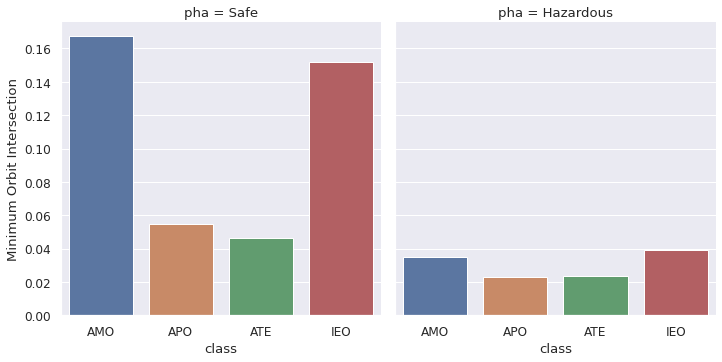

In [11]:
temp = df.copy()
temp['pha'] = df['pha'].replace({0:'Safe', 1:'Hazardous'})
sns.catplot(data=temp, x='class', y='Minimum Orbit Intersection',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

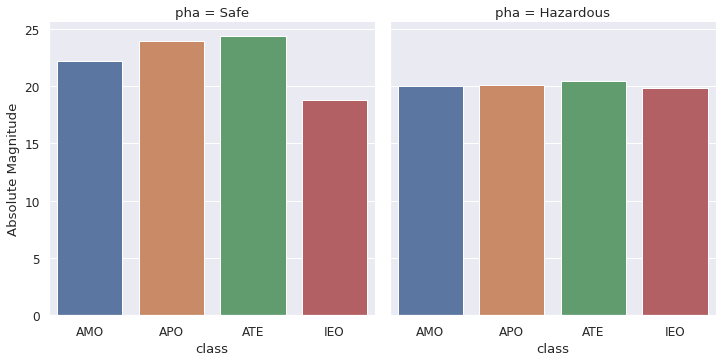

In [12]:
sns.catplot(data=temp, x='class', y='Absolute Magnitude',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

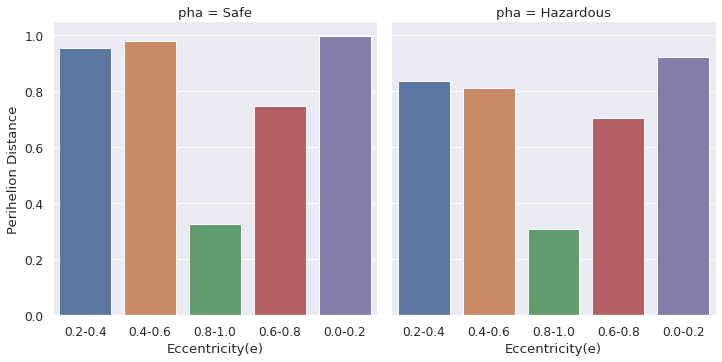

In [13]:
temp['Eccentricity(e)'] = ecc_groups
sns.catplot(data=temp, x='Eccentricity(e)', y='Perihelion Distance',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


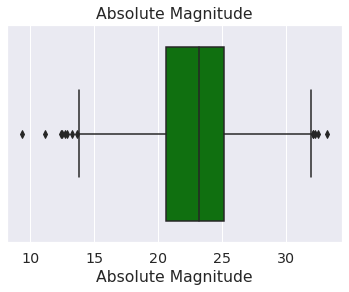

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


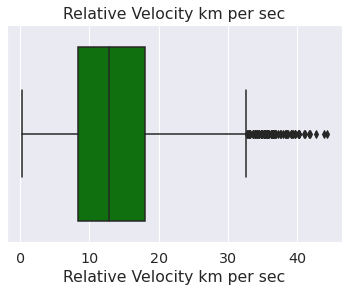

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


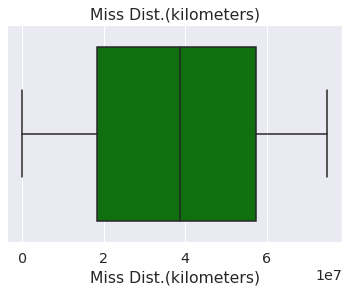

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


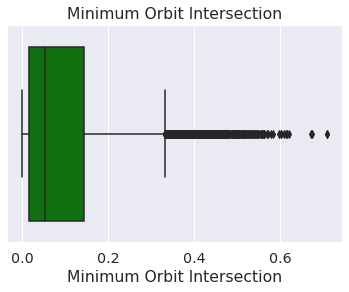

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


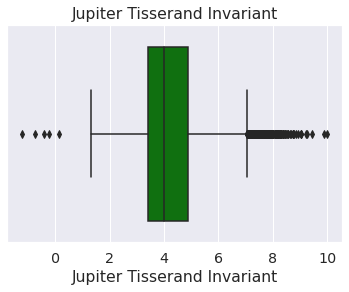

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


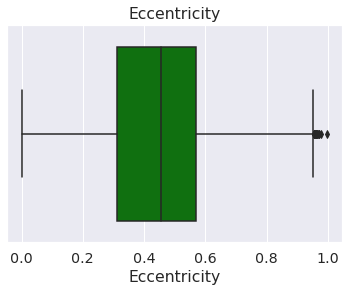

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


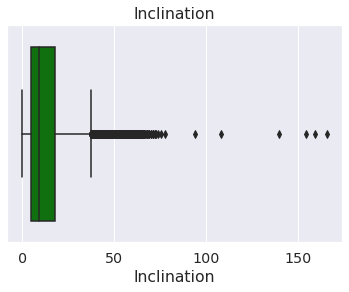

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


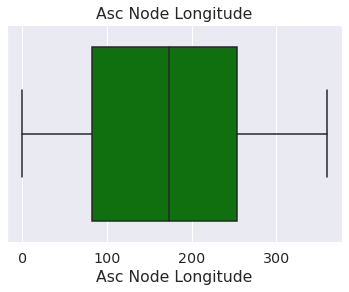

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


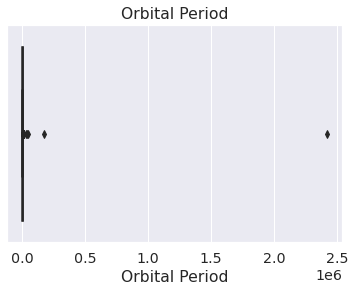

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


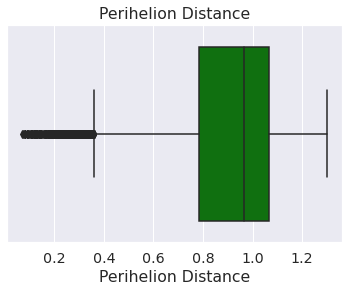

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


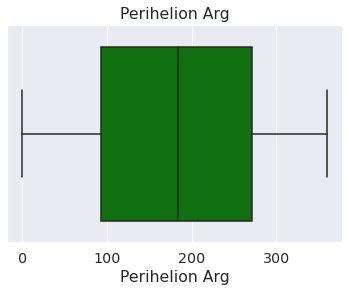

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


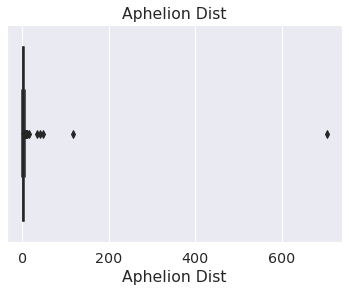

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


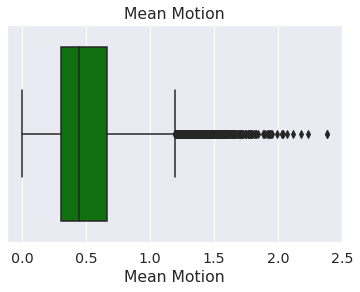

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


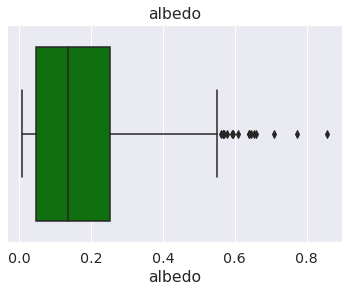

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


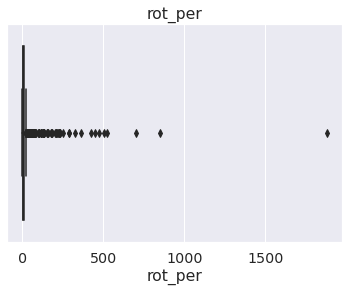

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


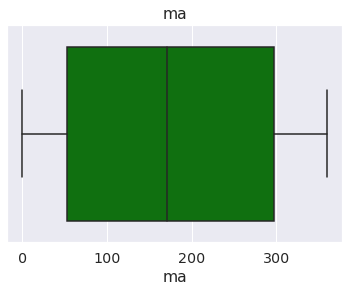

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


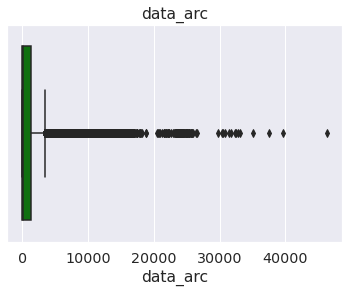

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


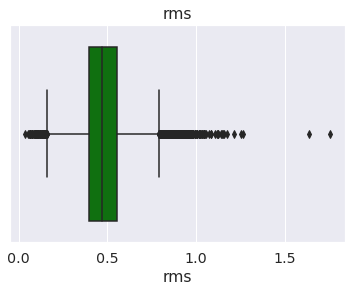

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


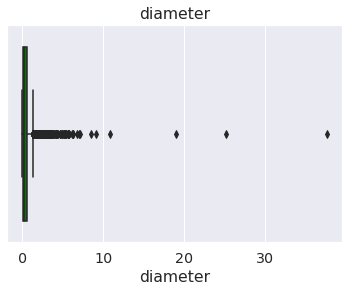

In [17]:
sns.set(font_scale=1.3)
for col in cont_cols:
    sns.boxplot(df[col].dropna(), color='green')
    plt.title(col)
    plt.show()

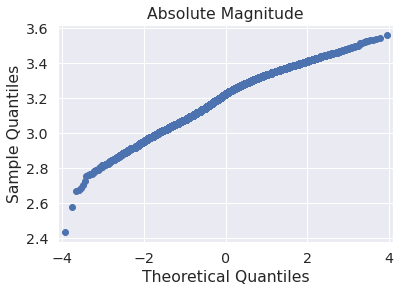

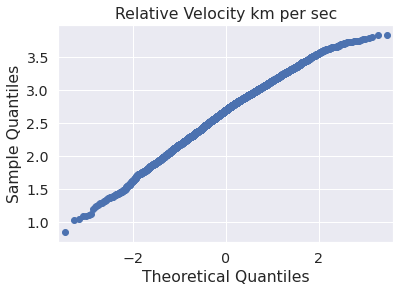

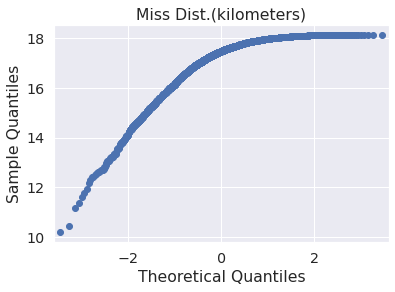

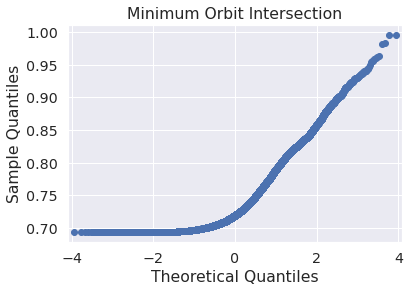

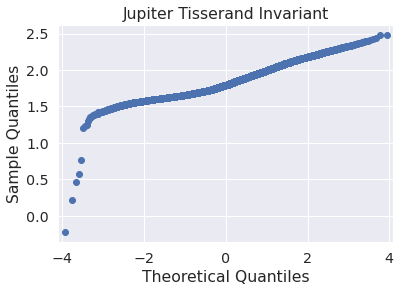

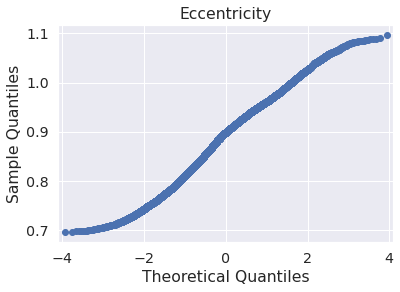

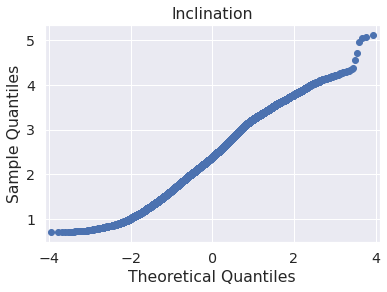

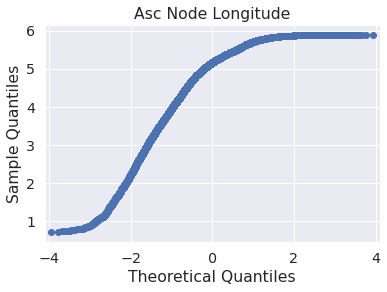

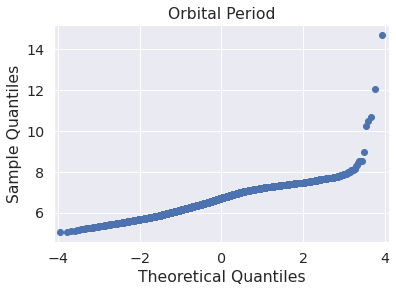

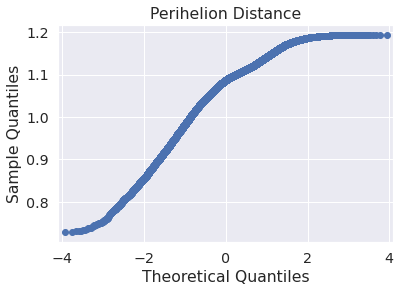

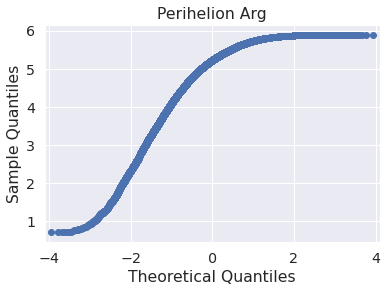

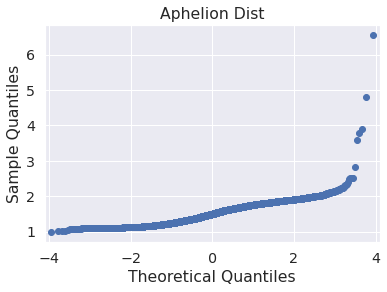

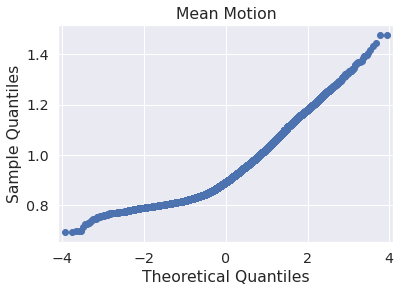

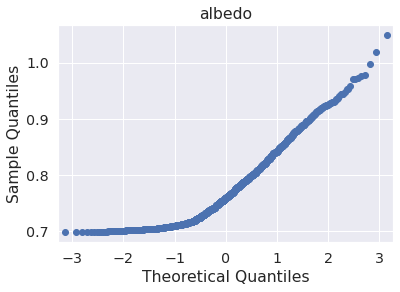

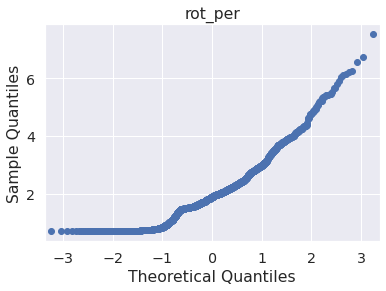

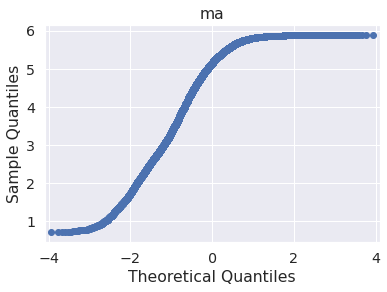

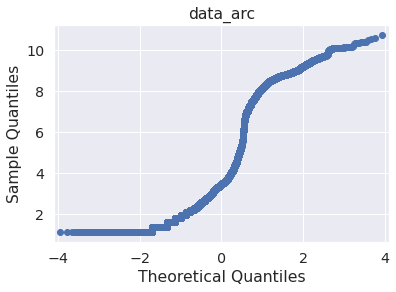

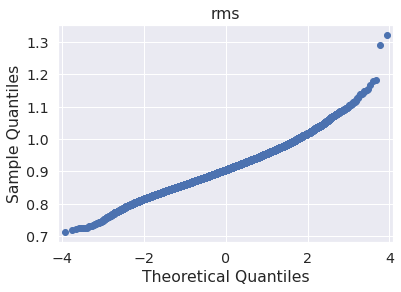

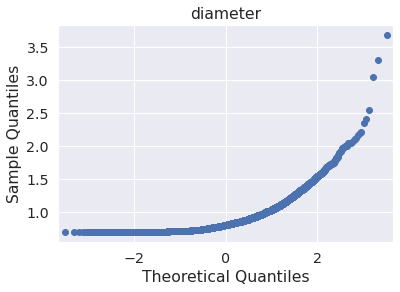

In [21]:
for col in cont_cols:
    fig = sm.qqplot(np.log(df[col].dropna()+2))        #drawing qq plots for the log of the distribution----
                                                   # added a dc offset not sure if we require it
    plt.title(col)
    plt.show()